In [1]:
import xarray as xr

In [2]:
config_id = 'ESM4_historical_D1'
rootdir = '/work/gam/zarr/'+config_id+'/'
filename = 'ocean_cobalt_omip_2d_1x1deg.ts.zarr'
ds = xr.open_zarr(rootdir+filename)

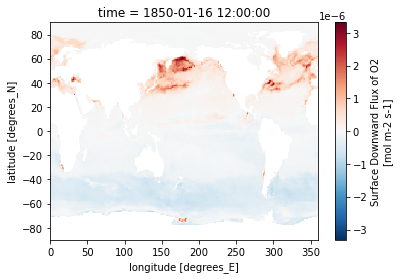

In [4]:
ds['fgo2'].isel(time=0).plot()